### Read data from files

In [1]:
import pandas as pd

# raw data
df_home = pd.read_csv('./data/home_page_table.csv')
df_search = pd.read_csv('./data/search_page_table.csv')
df_payment = pd.read_csv('./data/payment_page_table.csv')
df_payment_confirmation = pd.read_csv('./data/payment_confirmation_table.csv')
df_users = pd.read_csv('./data/user_table.csv')

# user data (i.g. user id with date, device, and sex data) in each page
df_home_users = df_users[df_users['user_id'].isin(df_home['user_id'])]
df_search_users = df_users[df_users['user_id'].isin(df_search['user_id'])]
df_payment_users = df_users[df_users['user_id'].isin(df_payment['user_id'])]
df_payment_confirmation_users = df_users[df_users['user_id'].isin(df_payment_confirmation['user_id'])]


#### User data sample

In [2]:
print(df_users.head(5))

   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male


#### Home page data sample

In [3]:
print(df_home.head(5))

   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page


#### Home page user data sample

In [4]:
print(df_home_users.head(5))

   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male


### Identify users who left between pages

##### Home Page to Search Page

In [5]:
# ids of users who left from home page
df_home_to_search = pd.concat([df_home, df_search]).drop_duplicates(subset='user_id', keep=False)

# data of users who left from home page
df_home_to_search_users = df_users[df_users['user_id'].isin(df_home_to_search['user_id'])]

##### Search Page to Payment Page

In [6]:
# ids of users who left from search page
df_search_to_payment = pd.concat([df_search, df_payment]).drop_duplicates(subset='user_id', keep=False)

# data of users who left from home page
df_search_to_payment_users = df_users[df_users['user_id'].isin(df_search_to_payment['user_id'])]

##### Payment Page to Payment Confirmation Page

In [7]:
# ids of users who left from payment page
df_payment_to_payment_confirmation = pd.concat([df_payment, df_payment_confirmation]).drop_duplicates(subset='user_id', keep=False)

# data of users who left from payment page
df_payment_to_payment_confirmation_users = df_users[df_users['user_id'].isin(df_payment_to_payment_confirmation['user_id'])]

### Visualize left user data

Plot bar graphs to show number of users who left from each page, categorized by device and sex.

#### Define functions

In [8]:
import matplotlib.pyplot as plt

LABEL_1 = 'Desktop/Male'
LABEL_2 = 'Desktop/Female'
LABEL_3 = 'Mobile/Male'
LABEL_4 = 'Mobile/Female'

def visualize(users, title):
    x = [LABEL_1, LABEL_2, LABEL_3, LABEL_4]
    y = categorize(users)
    plt.xlabel('User Data')
    plt.ylabel('Number of Users')
    plt.title(title)
    plt.bar(x, y, width=0.1)
    
# return numbers of users, categorized by device and sex
def categorize(users):
    data = [len(users[(users.device == LABEL_1.split('/')[0]) & (users.sex == LABEL_1.split('/')[1])]),
            len(users[(users.device == LABEL_2.split('/')[0]) & (users.sex == LABEL_2.split('/')[1])]),
            len(users[(users.device == LABEL_3.split('/')[0]) & (users.sex == LABEL_3.split('/')[1])]),
            len(users[(users.device == LABEL_4.split('/')[0]) & (users.sex == LABEL_4.split('/')[1])])]
    return data
    
# print out percentage and numbers of users who left from page, based on category
def show_detail(left_users, users):
    categorized_left_users = categorize(left_users)
    categorized_users = categorize(users)
    print(LABEL_1 + ": " + str(categorized_left_users[0]) + " users (" + str(int(categorized_left_users[0] / categorized_users[0] * 100)) + "%)")
    print(LABEL_2 + ": " + str(categorized_left_users[1]) + " users (" + str(int(categorized_left_users[1] / categorized_users[1] * 100)) + "%)")
    print(LABEL_3 + ": " + str(categorized_left_users[2]) + " users (" + str(int(categorized_left_users[2] / categorized_users[0] * 100)) + "%)")
    print(LABEL_4 + ": " + str(categorized_left_users[3]) + " users (" + str(int(categorized_left_users[3] / categorized_users[0] * 100)) + "%)")
    print("Total: " + str(len(left_users)) + " users (" + str(int(len(left_users) / len(users) * 100)) + "%)")

#### Visualize data

Desktop/Male: 15194 users (50%)
Desktop/Female: 14906 users (49%)
Mobile/Male: 7607 users (25%)
Mobile/Female: 7493 users (24%)
Total: 45200 users (50%)


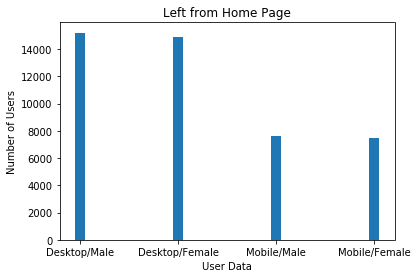

In [9]:
visualize(df_home_to_search_users, 'Left from Home Page')
show_detail(df_home_to_search_users, df_home_users)

Desktop/Male: 13529 users (90%)
Desktop/Female: 13561 users (89%)
Mobile/Male: 6065 users (40%)
Mobile/Female: 6015 users (40%)
Total: 39170 users (86%)


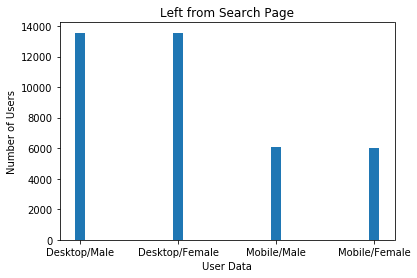

In [10]:
visualize(df_search_to_payment_users, 'Left from Search Page')
show_detail(df_search_to_payment_users, df_search_users)

Desktop/Male: 1404 users (94%)
Desktop/Female: 1456 users (95%)
Mobile/Male: 1315 users (88%)
Mobile/Female: 1403 users (94%)
Total: 5578 users (92%)


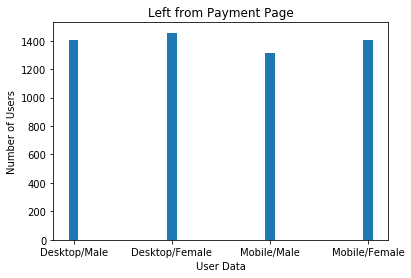

In [11]:
visualize(df_payment_to_payment_confirmation_users, 'Left from Payment Page')
show_detail(df_payment_to_payment_confirmation_users, df_payment_users)

The users who accessed the website using desktop device tend to leave the website on home page and search page more than the users who used mobile device.

### Visualize user data

Plot timeline graphs to show number of users on each page, categorized by device and sex.

#### Define functions

In [12]:
import datetime as dt
import matplotlib.patches as mpatches

DATE_FORMAT = '%Y-%m-%d'

# get sorted distict date to be used as data on X axis
def get_dates(users):
    user_dates = users['date'].drop_duplicates()
    dates = [dt.datetime.strptime(date, DATE_FORMAT).date() for date in user_dates]
    dates.sort()
    return dates

# return numbers of users on each day, categorized by device and sex
def get_number_of_users(users, dates):
    number_of_users = []
    for date in dates:
        number_of_users.append([len(users[(users.date == date.strftime(DATE_FORMAT)) & (users.device == LABEL_1.split('/')[0]) & (users.sex == LABEL_1.split('/')[1])]),
                                len(users[(users.date == date.strftime(DATE_FORMAT)) & (users.device == LABEL_2.split('/')[0]) & (users.sex == LABEL_2.split('/')[1])]),
                                len(users[(users.date == date.strftime(DATE_FORMAT)) & (users.device == LABEL_3.split('/')[0]) & (users.sex == LABEL_3.split('/')[1])]),
                                len(users[(users.date == date.strftime(DATE_FORMAT)) & (users.device == LABEL_4.split('/')[0]) & (users.sex == LABEL_4.split('/')[1])])])
    return number_of_users

def patch():
    blue_patch = mpatches.Patch(color='blue', label=LABEL_1)
    orange_patch = mpatches.Patch(color='orange', label=LABEL_2)
    green_patch = mpatches.Patch(color='green', label=LABEL_3)
    red_patch = mpatches.Patch(color='red', label=LABEL_4)
    plt.legend(handles=[blue_patch, orange_patch, green_patch, red_patch])

def plot(x, y, title):
    plt.xlabel('date')
    plt.ylabel('user')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.rcParams["figure.figsize"] = [32,9]
    plt.plot(x, y, '-o')
    patch()
    
def process(users, title):
    dates = get_dates(users)
    number_of_users = get_number_of_users(users, dates)
    plot(dates, number_of_users, title)


#### Visualize data

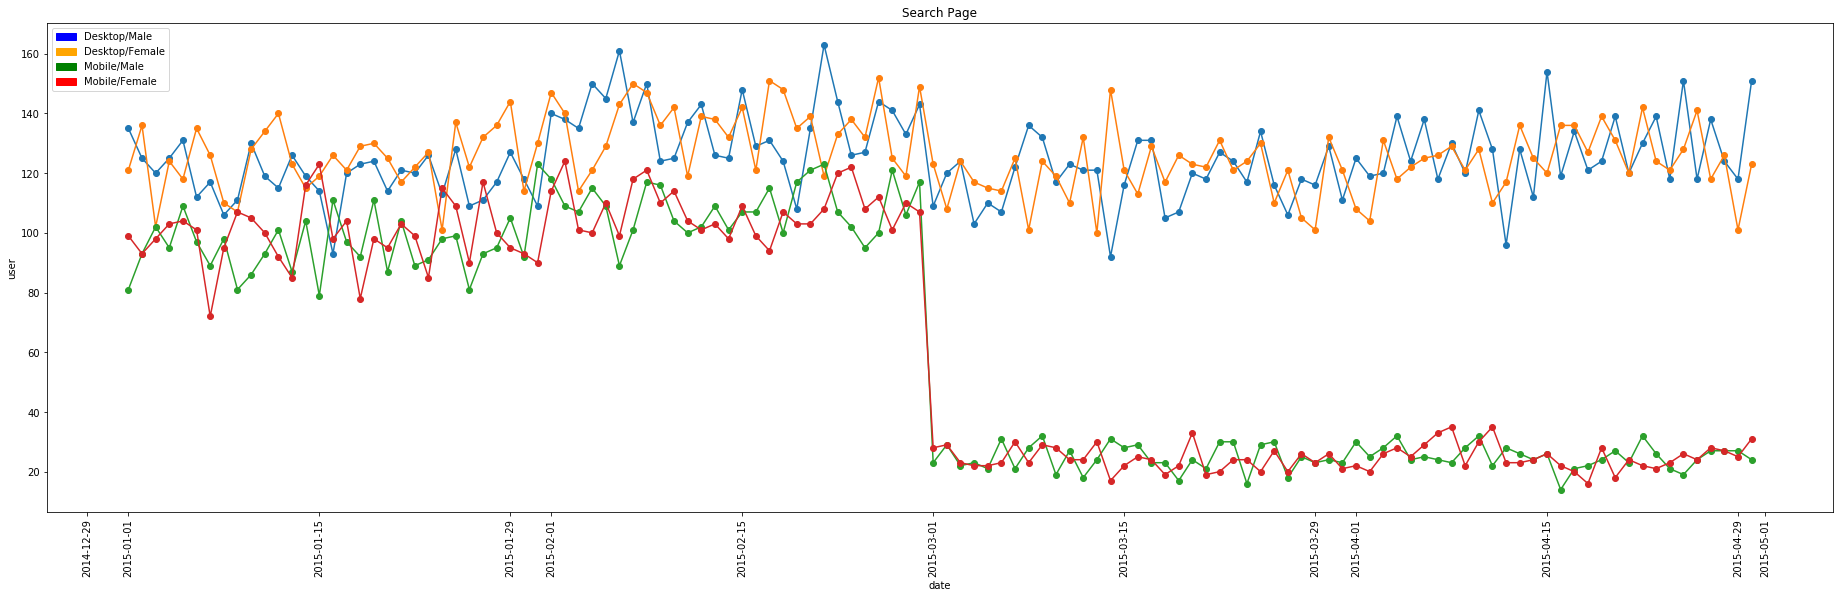

In [16]:
process(df_search_users, "Search Page")

On search page, the number of users who accessed the website via mobile device significantly dropped after the third month.

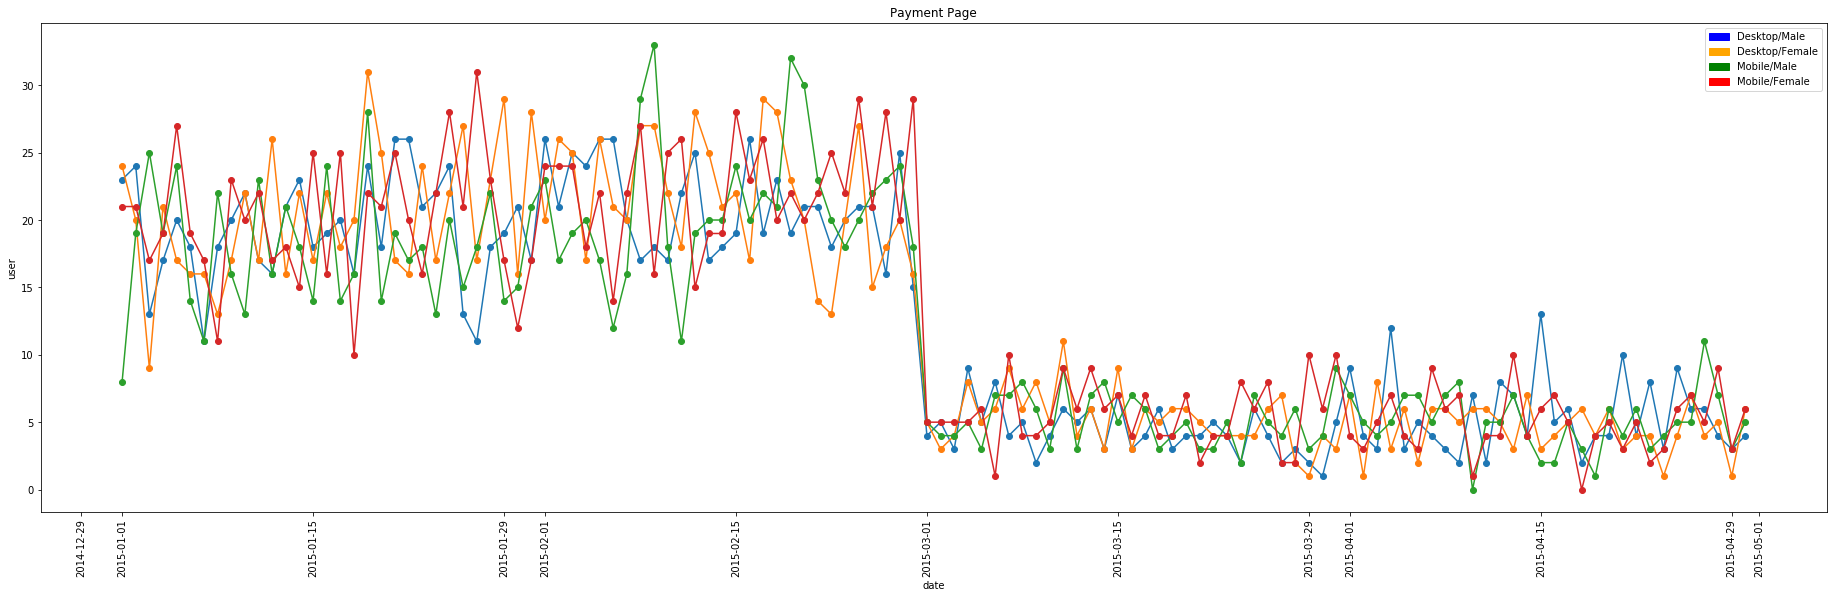

In [14]:
process(df_payment_users, 'Payment Page')

The number of users significantly dropped after the third month.

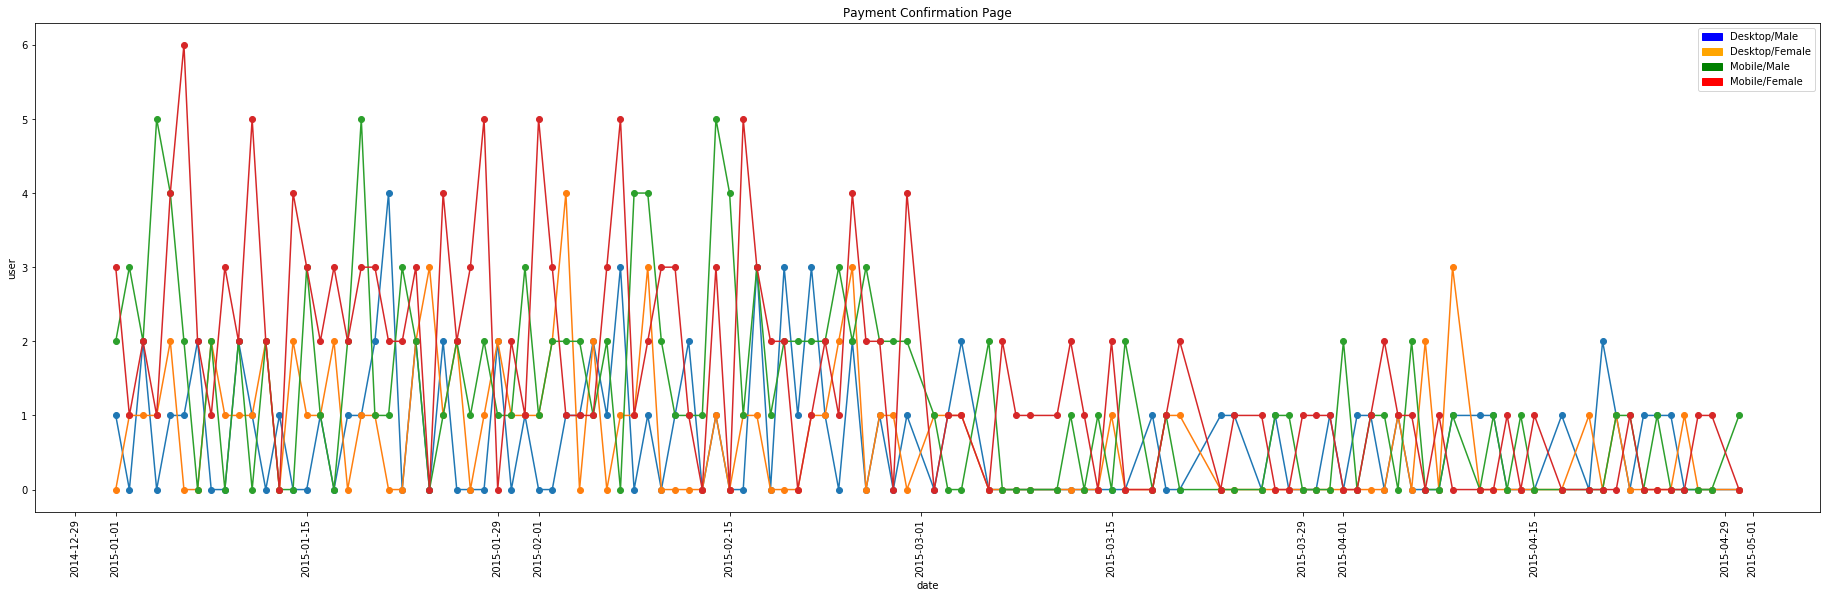

In [15]:
process(df_payment_confirmation_users, 'Payment Confirmation Page')